## Predicting energy production from wind turbines


In this project, simple linear regression using Python will be explained in the energy production data set. The goal is to accurately predict the energy production of the wind turbine from wind speed values using the data set as a basis.

### Setting the notebook to run the codes

In [1]:
# Pandas is a library for manipulating and analyzing data
import pandas as pd

# NumPy is a package that supports multidimensional arrays and arrays
import numpy as np

# This module provides functions for calculating mathematical statistics of numeric (Real-valued) data.
import statistics as stat

# Seaborn is a data visualization library. It provides a high-level interface for drawing attractive statistical graphs.
import seaborn as sns

# Matplotlib is a library for creating graphs and data visualizations in general
import matplotlib.pyplot as plt

# % matplotlib inline defines that the output of the plotting commands is displayed directly below the code cell.
%matplotlib inline

In [2]:
# Setting plot style.
plt.style.use("ggplot")

# Setting the sizes of the figures.
plt.rcParams["figure.figsize"] = (14,7)

### Opening and reading the dataset

In [3]:
# opening and reading the file
df = pd.read_csv('powerproduction.csv')

When we collect information, we generally do it by sampling. This information goes far beyond numbers or words, they bring with them characteristics and contexts that will be fundamental for our future analyzes. Each of these characteristics collected, such as weight, height, sex or age, is called a variable.

Variables can take on different values, which can basically be separated into:

##### Quantitative or numerical variables: 
- Discreet: assume only integer values. Eg: number of brothers, number of passengers.
- Continuous: assume any value in the range of real numbers. Ex .: weight, height.

##### Qualitative or categorical variables:
- Nominal: when the categories do not have a natural order. Eg: names, colors, sex.
- Ordinal: when categories can be ordered. Eg: size (small, medium, large), social class (low, medium, high), education level (basic, medium, undergraduate, graduate).


As we know that we are dealing with wind speed and energy variables (both have measurement metrics), in addition to being float type as shown below we will assume that our data are based on continuous numeric variables.

In [4]:
# analyzing information on number of columns, number of lines and type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   speed   500 non-null    float64
 1   power   500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [5]:
# analyzing the first ten lines
df.head(10)

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


In [6]:
# checking for null data in the data set
df.isnull().sum()

speed    0
power    0
dtype: int64

In [7]:
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


### Initial data set view

Text(0, 0.5, 'Power')

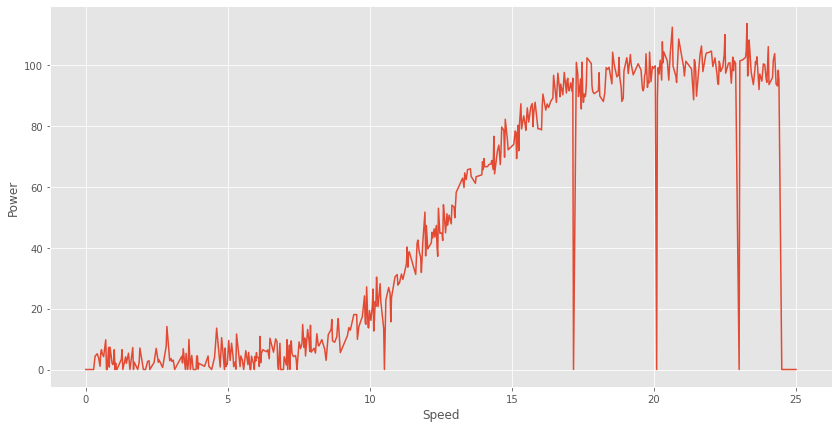

In [8]:
# Plot x vs y.
plt.plot('speed', 'power', data=df)
plt.xlabel("Speed")
plt.ylabel("Power")

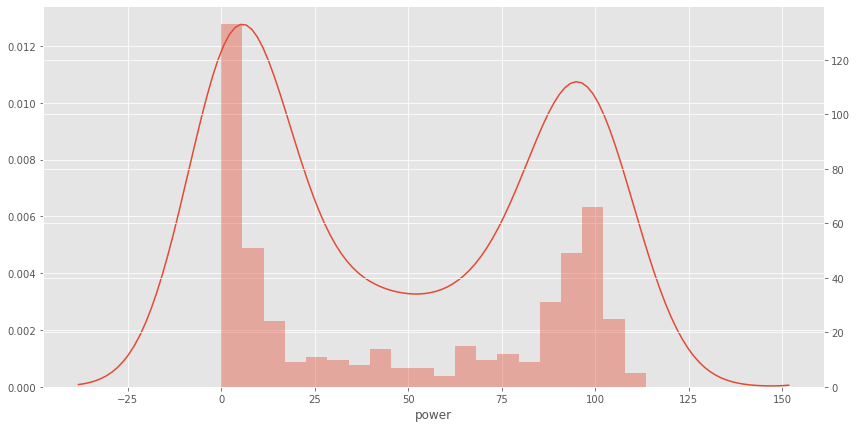

In [9]:
# Plot y variable to see the distribution.
fig, ax = plt.subplots(1, 1)
sns.distplot(df["power"], ax=ax, 
                  kde=True, hist=False) 
bins = 20
ax_copy = ax.twinx()
g2 = sns.distplot(df["power"], ax=ax_copy, kde=False, hist=True, 
             bins=bins)

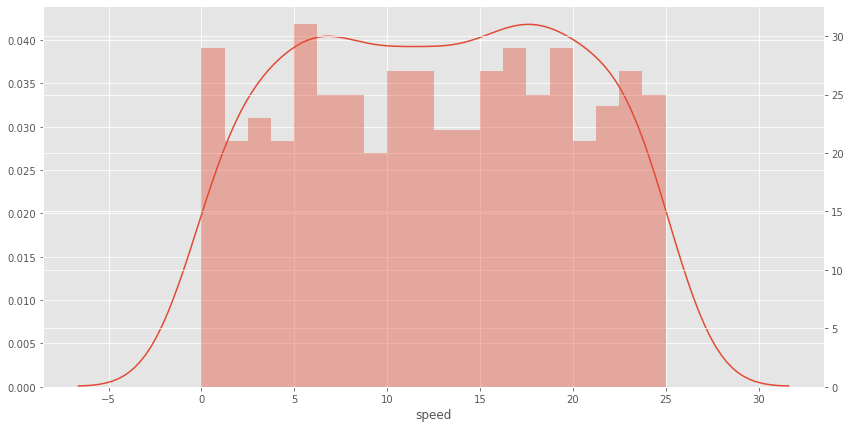

In [10]:
# Plot x variable to see the distribution.

fig, ax = plt.subplots(1, 1)
sns.distplot(df["speed"], ax=ax, 
                  kde=True, hist=False) 
bins = 20
ax_copy = ax.twinx()
g2 = sns.distplot(df["speed"], ax=ax_copy, kde=False, hist=True, 
             bins=bins, norm_hist=False)

### Analyzing the distributions

In the first graph we can interpret that the power only starts to increase on average after a certain speed between 6 and 8. We also noticed that the relation of the variables x (speed) and y (power) is not linear.
Below we see that in the graphs generated that the variable 'power' does not follow a specific distribution. Perhaps we could interpret it as a bimodal distribution because it has two curves, but we gave up on this idea when we checked the mode below. Anyway, we found that there are two peaks of data to interpret a possible behavior. Unlike the variable 'speed', which clearly incurs a uniform distribution.

https://docs.python.org/3/library/statistics.html#statistics.multimode
https://en.wikipedia.org/wiki/Continuous_uniform_distribution

In [11]:
# checking the mode
mode=stat.mode(df['power'])
mode

0.0

In [12]:
# checking if there is more than one mode
mode=stat.multimode(df['power'])
mode

[0.0]

### Identifying dispersion measures

First we will normalize the data and then through the standard deviation we will have some clue.

According to Gorrie, the objective of the Z-score is to remove the effects of the location and scale of the data, allowing direct comparison between different databases. As the data is centralized and re-scaled, any point that is too far from zero can be considered an outlier. According to Swarupa, a cutoff limit of the Z-score accepted by the literature is a value outside the range + or -3. [] https://en.wikipedia.org/wiki/Standard_score

https://pt.qaz.wiki/wiki/Probability_distribution



In [13]:
# assigning the variables x and y for each column
x = df['speed']
y = df['power']

In [14]:
# finding the mean
xi_mean = np.mean(x)
yi_mean = np.mean(y)
xi_mean, yi_mean

(12.590397999999988, 48.014584)

In [15]:
# fiding the standard deviation
xi_sd = np.std(x, ddof=1)
yi_sd = np.std(y, ddof=1)
xi_sd, yi_sd

(7.224991249593965, 41.61457229410613)

In [16]:
# finding the variance
xi_var = np.var(x, ddof=1)
yi_var = np.var(y, ddof=1)
xi_var, yi_var

(52.20049855670937, 1731.7726272213856)

In [17]:
# fiding the Z-score
z_score_x = (x - xi_mean)/xi_sd
z_score_y = (y - yi_mean)/yi_sd

# including normalized data in the df
df['Z-score Speed'] = pd.DataFrame(z_score_x, index=df.index)
df['Z-score Power'] = pd.DataFrame(z_score_y, index=df.index)

In [18]:
# checking for anomaly
df_norm = df.loc[(df['Z-score Power'] < (-3))]
df_norm = df.loc[(df['Z-score Power'] > (3))]
df_norm = df.loc[(df['Z-score Speed'] < (-3))]
df_norm = df.loc[(df['Z-score Speed'] > (3))]
df_norm

,speed,power,Z-score Speed,Z-score Power


In [19]:
# checking the zeros contained in the speed column
df_removed = df.loc[(df['speed'] == 0)]
len(df_removed) 

1

In [20]:
# checking and removing the zeros contained in the power column
df_removed = df.loc[(df['power'] == 0)]
df_final = df.drop(df_removed.index)
len(df_final) 

451

In [21]:
# checking the main information
df_final.describe()

,speed,power,Z-score Speed,Z-score Power
count,451.000000,451.000000,451.000000,451.000000
mean,13.004302,53.231246,0.057288,0.125357
std,6.835979,40.522055,0.946157,0.973747
min,0.325000,0.067000,-1.697635,-1.152183
25%,7.344500,8.543500,-0.726077,-0.948492
50%,13.038000,58.168000,0.061952,0.243987
75%,18.781500,94.725500,0.856901,1.122465
max,24.399000,113.556000,1.634411,1.574963


In [22]:
# checking the mode
stat.multimode(z_score_y)

[-1.153792562390466]

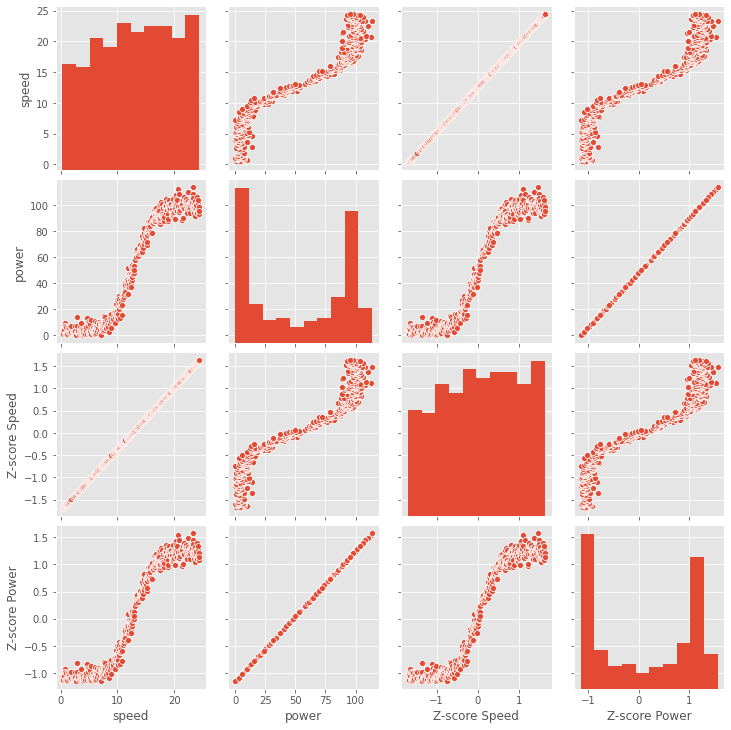

In [23]:
# Ploting the best points for analysis.
sns.pairplot(data=df_final)

### Correlation

The initial definition sums up the idea well: the correlation indicates the interdependence between two or more variables.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

In [24]:
# checking the correlations (0.7 to 0.9 positive or negative indicates a strong correlation)
df_final.corr(method = 'pearson')

,speed,power,Z-score Speed,Z-score Power
speed,1.000000,0.947884,1.000000,0.947884
power,0.947884,1.000000,0.947884,1.000000
Z-score Speed,1.000000,0.947884,1.000000,0.947884
Z-score Power,0.947884,1.000000,0.947884,1.000000


### Choosing the model - Linear Regression

Linear regression is a methodology developed from statistics and econometrics. This method is used to evaluate the effects that other variables have on an analyzed variable. []

The relationship starts from a variable of interest (dependent) with others that may influence it.

With the results obtained, linear regression visualizes the biggest trends that the analyzed variables present. The regression consists of statistically modeling the values to be observed.

This regression is linear when the events observed on a scatter plot indicate a trend in a straight line format and as we saw earlier, the graph relating x and y does not form a straight line. Therefore, we will continue with the formula below able to adapt the data to what we want to visualize.

### Ordinary Least Squares

Linear regression is simple when only two variables are analyzed, usually X and Y, one of which is dependent (Y) and the function of another that behaves independently (X).

Simple linear regression is analyzed using the formula:

### $$ y = b*x+a $$

Where "a" is the linear coefficient and "b" is the slope or regression coefficient. []

To find the value of a and b we will try to reproduce it according to the formula below.

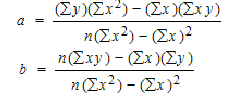

In [25]:
# assigning the variables x and y for each column
x_f= df_final['speed']
y_f= df_final['power']

In [26]:
b = ((len(y_f) * (x_f*y_f).sum() - x_f.sum()*y_f.sum())/ (len(y_f)*(x_f**2).sum() - (x_f.sum())**2)).round(2)
b

5.62

In [27]:
a = ((y_f.sum() - b * x_f.sum()) / len(y_f)). round(2)
a

-19.85

In [28]:
# Or we can apply Numpy directly
coeffs = np.polyfit(x_f, y_f, 1)
coeffs

array([  5.61882784, -19.83768545])

In [29]:
# we transform the result into an array to adjust the curve
pred1 = np.array(b*x_f+a)
pred1

array([-1.8023500e+01, -1.7602000e+01, -1.7321000e+01, -1.7034380e+01,
       -1.6893880e+01, -1.6753380e+01, -1.6612880e+01, -1.6331880e+01,
       -1.6050880e+01, -1.5910380e+01, -1.5348380e+01, -1.5207880e+01,
       -1.5067380e+01, -1.4645880e+01, -1.4505380e+01, -1.4364880e+01,
       -1.4224380e+01, -1.3943380e+01, -1.3662380e+01, -1.3381380e+01,
       -1.2819380e+01, -1.2678880e+01, -1.1976380e+01, -1.1835880e+01,
       -1.1408760e+01, -1.0565760e+01, -1.0284760e+01, -9.3012600e+00,
       -9.1607600e+00, -7.6152600e+00, -7.3342600e+00, -6.3507600e+00,
       -5.9292600e+00, -5.5021400e+00, -5.3616400e+00, -4.6591400e+00,
       -3.9566400e+00, -3.8161400e+00, -3.2541400e+00, -2.9731400e+00,
       -2.8326400e+00, -2.6921400e+00, -2.5516400e+00, -1.8491400e+00,
       -8.6564000e-01, -7.2514000e-01, -5.8464000e-01, -1.7020000e-02,
        4.0448000e-01,  5.4498000e-01,  9.6648000e-01,  1.1069800e+00,
        2.0904800e+00,  2.2309800e+00,  2.3714800e+00,  2.5119800e+00,
      

In [30]:
# Add some noise to compare
pred2 = 6.0 * x_f + (-10.0) + np.random.normal(0.0, 0.3, len(x_f))

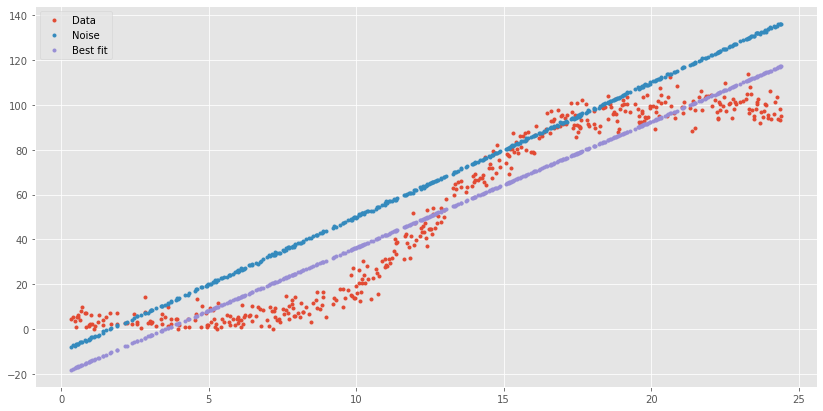

In [31]:
# Plot the best fit line over the data points.
plt.plot(x_f, y_f, '.', label="Data")
plt.plot(x_f, pred2, '.', label="Noise")
plt.plot(x_f, coeffs[0] * x_f + coeffs[1], '.', label='Best fit')
plt.legend();

In [32]:
# Calculate the cost of the lines above for the data above.
#cost = lambda b,a: np.sum([(y_f[i] - b * x_f[i] - a)**2 for i in range(x_f.size)])
#print("Cost with b = %5.2f and a = %5.2f: %8.2f" % (5.62, -19.85, cost(5.62, -19.85)))

### Evaluating the model

After adjusting a linear model previously shown we now need to determine how well the model fits the data.

The R-square is a statistical measure of how close the data is to the adjusted regression line. It is also known as the coefficient of determination or the coefficient of multiple determination for multiple regression.

The definition of the R-square is quite simple: it is the percentage of the variation of the response variable that is explained by a linear model. Or:

R-squared = Explained variation / Total variation

The R-squared is always between 0 and 100%:

- 0% indicates that the model does not explain any of the variability of response data around its mean.
- 100% indicates that the model explains all the variability of response data around its mean.

In general, the higher the R-square, the better the model fits the data. However, there are important conditions for this guideline.

To find the value of R-square we will try to reproduce it according to the formula below.

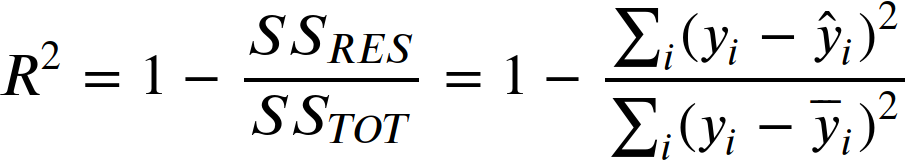

In [33]:
ssr = ((y_f - pred1)**2).sum()
ssr

75012.41817098242

In [34]:
sst = ((y_f-yi_mean)**2).sum()
sst

751189.9274255122

In [35]:
df_final['yi_mean'] = yi_mean

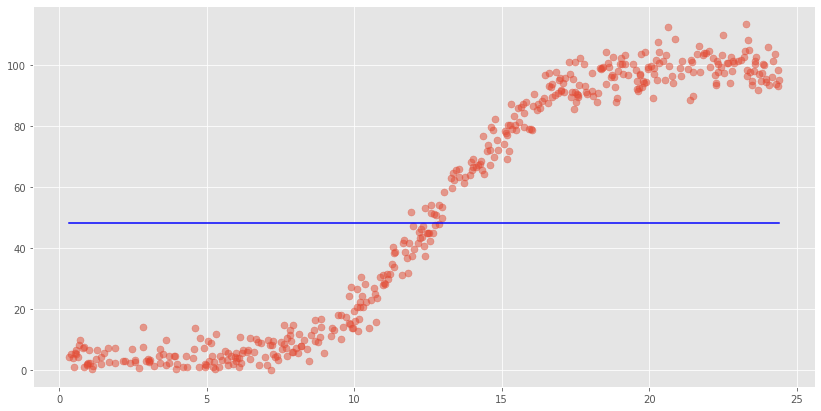

In [59]:
plt.scatter(x_f,y_f, s=50, alpha=.5)
plt.plot(x_f,df_final['yi_mean'], color='blue')

In [37]:
r_square = (1 - ssr/sst).round(2)
r_square # The r-square can explain approximately 90% of the data

0.9

The RMSE calculates how close the actual data points are to the values predicted by the model and is used to measure the standard deviation of the residuals. The RMSE serves to aggregate these residues in a single measure of predictive capacity.

The RMSE is calculated using the following equation:

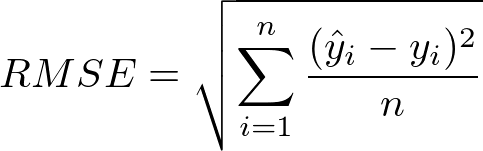

In [38]:
rmse = np.sqrt(ssr/len(df))
rmse

12.248462611363307

### 68–95–99.7 rule

The rule of thumb is the statistical rule for a normal distribution determined with the mean and standard deviation. According to her, 68% of the data fall within the first DP, 95% within the first two DP and 99.7% within the first three DP. So it is also known as 68-95-99.7


In [39]:
one_above = pred1 + rmse
one_below = pred1 - rmse
two_above = pred1 + 2*rmse
two_below = pred1 - 2*rmse
three_above = pred1 + 3*rmse
three_below = pred1 - 3*rmse

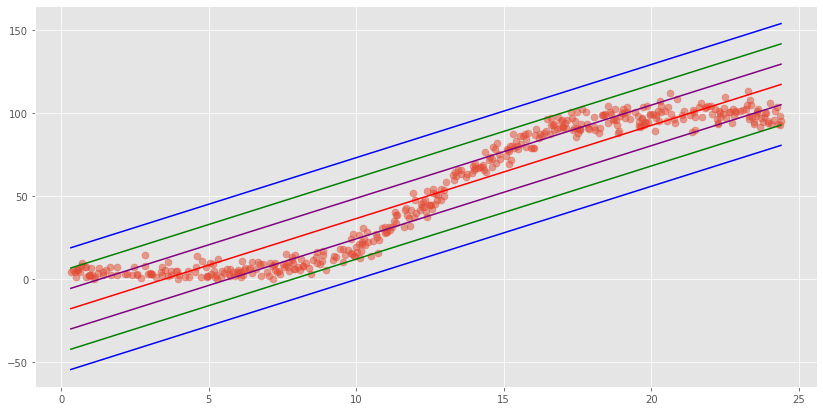

In [58]:
plt.scatter(x_f,y_f, s=50, alpha=.5)
plt.plot(x_f, pred1, color = 'red')
plt.plot(x_f, one_above, color = 'purple')
plt.plot(x_f, one_below, color = 'purple')
plt.plot(x_f, two_above, color = 'green')
plt.plot(x_f, two_below, color = 'green')
plt.plot(x_f, three_above, color = 'blue')
plt.plot(x_f, three_below, color = 'blue')

### Using sklearn

In [41]:
# importing the modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [42]:
# Expects a 2D array of inputs.
x = np.array(x_f).reshape(-1, 1)
y = np.array(y_f).reshape(-1, 1)

In [43]:
#separating the variables in test and training
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [44]:
# viewing the amount of data that has been scaled for testing
X_train.shape[0]

315

In [45]:
# instantiate the regression model
lm = LinearRegression()

In [46]:
# training the model
sk_model = lm.fit(X_train, y_train)

In [47]:
# Where the linear model crosses the y axis - "a" value in y = bx+a
print(lm.intercept_)

[-20.26051757]


In [48]:
# if the wind speed increases 1 the energy generated should increase by 5.04 on average = it is the "b" in y = bx+a
print(lm.coef_)

[[5.66499881]]


In [49]:
# generating the prediction
skpred = sk_model.predict(X_test)

In [50]:
print(lm.score(X_test, y_test))

0.9040610093049695


In [51]:
# finding the RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, skpred)))

12.526435300765414


### Comparing the predictive model with the initial data of the set.

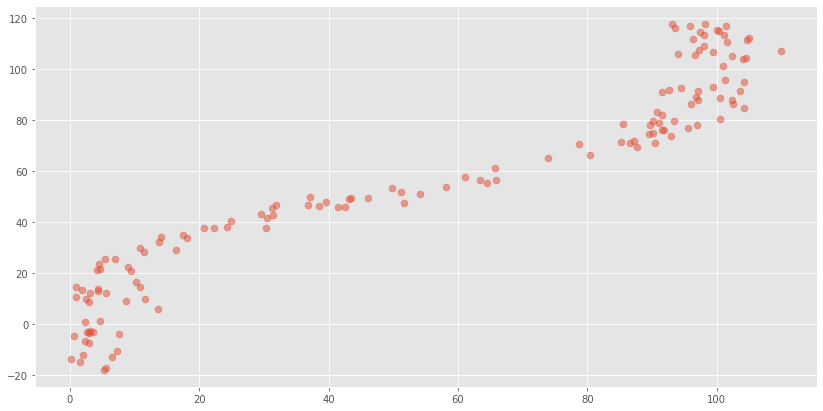

In [57]:
plt.scatter(y_test, skpred, s=50, alpha=.5)

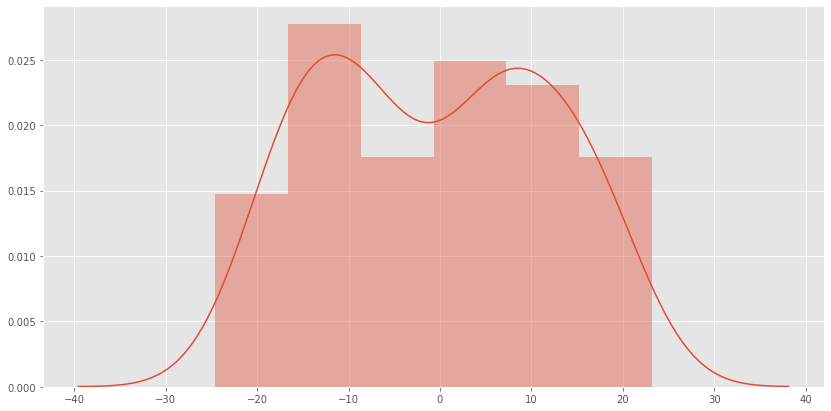

In [53]:
# calculating the waste distribution graph - it's a little bit more like a normal distribution
# where the errors in general are close to zero
# indicating that this would not be the best model
sns.distplot(y_test-skpred)

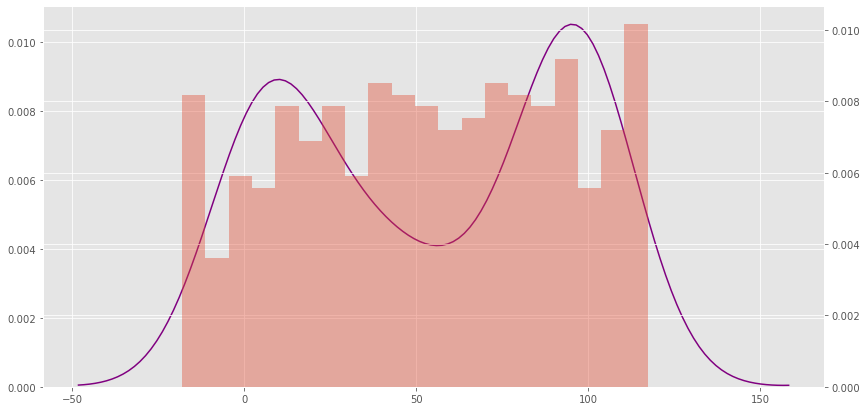

In [56]:
fig, ax = plt.subplots(1, 1)
sns.distplot(y_test, ax=ax, 
                  color="purple",kde=True, hist=False) 
bins = 20
ax_copy = ax.twinx()
g2 = sns.distplot(pred1, ax=ax_copy, kde=False, hist=True, 
             bins=bins, norm_hist=True)

###  Comparando a regressão linear simples com outros tipos de regressão neste conjunto de dados. 